# Prototyping

This notebook is my early thoughts and experiments on this project.

### Possible datasets

1. https://www.kaggle.com/andrewmvd/car-plate-detection
    - Public domain (asks for credit)
    - 433
    - Quality maybe 7/10 (some images have plates small or missing)
1. https://www.kaggle.com/thamizhsterio/indian-license-plates
    - No license found--might be ok for personal use
    - 10000 (!)
    - Quality 9 (actually cropped, which is nice)
1. https://www.kaggle.com/mrugankray/license-plates?
    - No license found--hmm
    - 200 something
    - Quality 6
1. https://www.kaggle.com/pcmill/license-plates-on-vehicles?select=HCZyJ9TY6QizRhqI.jpeg
    - Public domain, no attribution listed
    - 399
    - Quality 7
1. http://www.zemris.fer.hr/projects/LicensePlates/english/results.shtml
    - License unclear
    - 500 images
    - Quality 10 (really good pictures; all look to have been taken by the student)

**I think I'll use 1, 4, and 5.**

In [143]:
%matplotlib inline
import os
from PIL import Image, ImageEnhance
from numpy import random
from matplotlib.pyplot import imshow
import numpy as np
from IPython.display import Image as IImage

## Image degrading

In [13]:
!ls

prototyping.ipynb


In [1]:
import torchvision

In [15]:
base_path = '../data'

In [17]:
train_set = torchvision.datasets.ImageFolder(root=os.path.join(base_path, 'train'))

Directory structure:

- train
    - original
    - degraded
- valid
    - original
    - degraded

In [19]:
train_set.imgs

[('../data/train/original/06R3iOa3bATCEVXz.jpg', 0),
 ('../data/train/original/09Y0lBpIJ7tIplW2.jpg', 0),
 ('../data/train/original/0CDTBhPMJc1ZUf5S.jpg', 0),
 ('../data/train/original/0ETtCXFcSCgOLNyH.jpg', 0),
 ('../data/train/original/0KNVFEUQVov26wku.jpg', 0),
 ('../data/train/original/0WLUDeUFaBbyfqJK.jpg', 0),
 ('../data/train/original/0X1c3Yo2gzP46bNb.jpg', 0),
 ('../data/train/original/0X5bZskpz2fUUYVJ.jpg', 0),
 ('../data/train/original/0txdwQJANA69veu6.jpg', 0),
 ('../data/train/original/0u8gq295rn7kSbrq.jpg', 0),
 ('../data/train/original/1UUWFCqecyUqgwSX.jpg', 0),
 ('../data/train/original/1YBq69WVIPlgr4JI.jpg', 0),
 ('../data/train/original/1kzk0PjrUKfEj9Ec.jpg', 0),
 ('../data/train/original/1suKbBm5v8cdhqjK.jpg', 0),
 ('../data/train/original/2L5wGCJz6ku5Gkuc.jpg', 0),
 ('../data/train/original/2SyOpYQ85373ulfV.jpg', 0),
 ('../data/train/original/2arpgvv41uL5ZHMo.jpg', 0),
 ('../data/train/original/2lhddKidGpGXInAN.jpg', 0),
 ('../data/train/original/2mfPXz4KSTMXToFi.jpg

In [141]:
img_size = 200
def degrade_image(input, i=None):  
    img = Image.open(input)
    w, h = img.size
    ratio = min(img_size / w, img_size / h)
    target_size = int(w*ratio),int(h*ratio)
    img = img.resize(target_size, resample=Image.BILINEAR).convert('RGB')
    w,h = img.size
    q = random.randint(10,70)
    img.save('./test-degrade.jpg', quality=q)

**Problem: the original problem was for upscaling cropped licenses.**

Synthetic data might be a good option here. What's worth weighing is whether the extra effort of creating 2D license plate images (or 3D) is a good investment for whatever we gain. If we decide to go that route, there could be several options:

- Processing
    - Has 2D, 3D options (incl. with lighting--possibly for glare)
    - Can save entire canvas: https://processing.org/reference/save_.html
    - How we might do this:
        - Create a 2D texture for the license plate
            - Get a bunch of license plate blank backgrounds--at least one for every state and maybe some from out of the country
            - Find a few different fonts that might fit on license plates
            - Composite the two together, making sure that text generation is parameterized such that it never overflows 
        - Project that texture onto a plane and rotate it randomly but within a range where the numbers are always visible to the user
        - Draw a random imagenet image as the background to get the license plate in context
            - Or maybe a picture of a car? That might make more sense. Are there any massive public domain car datasets?
        - Light the scene such that
            - The brightness of the light is the mean (or median?) value of the background and maybe the hue matches as well, but the license plate can always be seen
                - Note that we want to have a variety of different lighting conditions to train on
            - There is a probability, when the scene is light enough, that the letters on the license plate will be partially obsured. This could be a combination of two things:
                - The specularity of the plate
                - The brightness and direction of the light
        - Translate the entire scene parallel to the viewer
            - Note that we don't need to always keep the entire license plate in frame, so some slop here would be acceptable

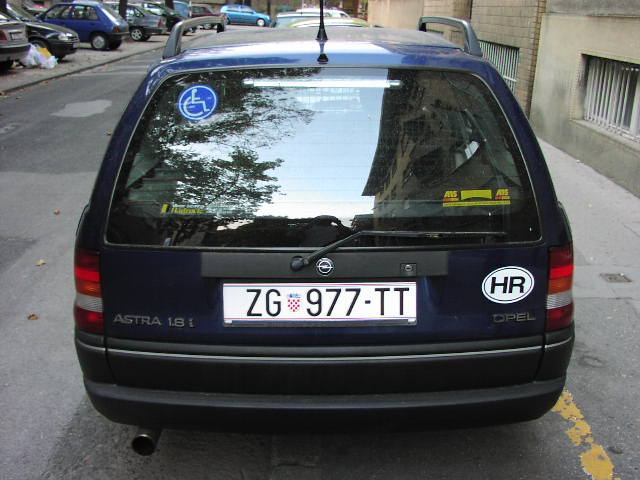

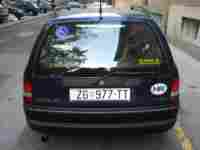

In [142]:
# Test things out
rand_idx = random.randint(0, len(train_set.imgs))
degrade_image(train_set.imgs[rand_idx][0])
display(IImage(train_set.imgs[rand_idx][0]))
display(IImage('test-degrade.jpg'))